# Domácí úkol


## 1. Spinograf
- **Úkol : nakreslete obrázek trajektorie bodu na spinografu pro zadané hodnoty**
    - $ R $  (poloměr větší kružnice),
    - $ r $  (poloměr menší kružnice), a
    - $ d $  (vzdálenost bodu od středu menší kružnice).
- Rozmyslete si kolik rotací musí menší kružnice udělat, aby se bod vrátil do své původní pozice. (vykreslete dráhu tak, aby byla uzavřená)
- Vyzkoušejte alespoň pro $R=10, r=3, d=1$ a $R=7, r=2, d=5$.
- Vykreslete pomocí tenké modré čáry, zvolte dostatek bodů, aby byla trajektorie plynulá (hladká).

---

### Co je to spinograf?
Jedná se o hru/výukovou pomůcku (viz. https://en.wikipedia.org/wiki/Spirograph).

Pro vysvětlení trajektorie bodu na spinografu (často označovaného jako hypotrochoida, když se menší kružnice otáčí uvnitř větší kružnice) použijeme goniometrický popis polohy bodu na kružnici v závislosti na úhlu rotace. Máme jednu větší kružnici s poloměrem  $ R $  a jednu menší kružnici s poloměrem  $ r $ , a chceme trasovat dráhu bodu, který je od středu menší kružnice vzdálen o vzdálenost  $ d $ .


### Poloha středu menší kružnice

Střed menší kružnice se otáčí uvnitř větší kružnice. Poloha středu menší kružnice v závislosti na úhlu  $ \theta $  je dána parametrickými rovnicemi v kartézských souřadnicích:

-  $ X = (R - r)  \cos(\theta) $ 
-  $ Y = (R - r)  \sin(\theta) $ 

kde  $ \theta $  je úhel rotace středu menší kružnice v radiánech.

### Otočení menší kružnice

Menší kružnice se otočí (valí se po větší kružnici). Úhel, o který se menší kružnice otočila ve svém vlastním středu vzhledem k počátečnímu bodu, je dán délkou oblouku, který urazila:
$$ \theta R $$

pokud chceme tento oblouk vyjádřit vzhledem k úhlu otočení v radiánech, o který se otočila menší kružnice ve svém středu,  převádíme zpětně z obvodu na úhel:
$$ \theta \frac{ R}{r} $$
poslední dvě důležitá pozotování jsou:
- malá kružnice se otočí negativně (tedy úhel je záporný)
- malá kružnice se otočí zároveň se svým středem, tedy k úhlu otočení musíme přičíst úhel $\theta$

Celkově máme:

$$ \phi = \theta - \theta \frac{R}{r} = - \theta \frac{R-r}{r} $$


### Pozice bodu na spinografu

Nakonec, sloučíme pozici středu a relativní pozici bodu ve vzdálenosti $d$ od středu menší kružnice

-  $ x = X + d \cos(\phi) = (R - r) \cos(\theta) + d \cos(- \theta \frac{R-r}{r})$ 
-  $ y = X + d \sin(\phi) = (R - r) \sin(\theta) + d \sin(- \theta \frac{R-r}{r})$ 

Pokud použijeme vlastnosti (sudost/lichost) gonimetricých funkcí, můžeme tyto rovnice zjednodušit na:

$$ x = (R - r) \cos(\theta) + d \cos(\theta \frac{R-r}{r})$$
$$ y = (R - r) \sin(\theta) - d \sin(\theta \frac{R-r}{r})$$

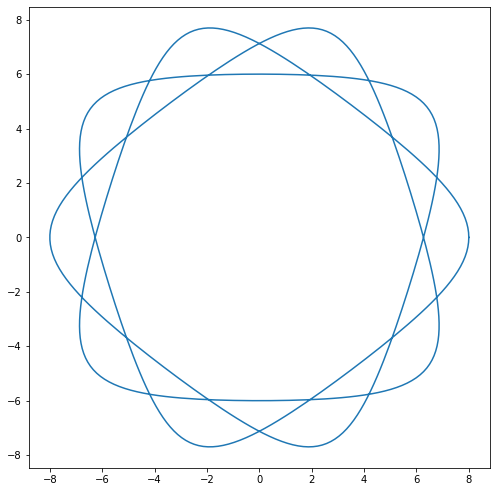

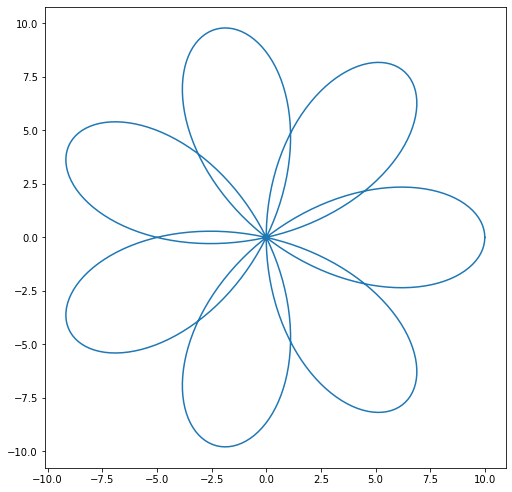

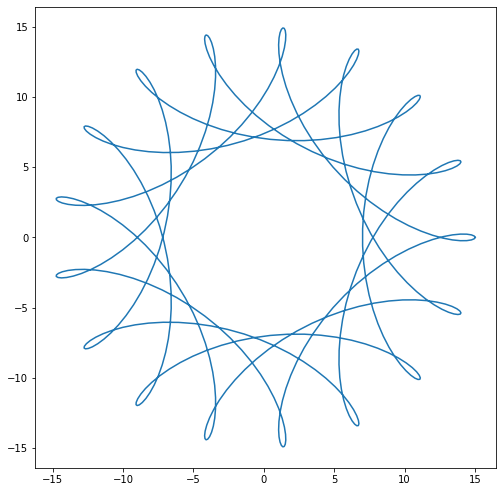

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

def xcoor(R,r,d,phi):
    return (R-r)*math.cos(phi) + d*math.cos( ((R-r)/r)*phi )

def ycoor(R,r,d,phi):
    return (R-r)*math.sin(phi) - d*math.sin( ((R-r)/r)*phi )

def spinograph(R, r, d):
    """
        R and r must be defined as non-divisible integers, 
        such that r/R gave correct ratio of r to R (or its aprxomation)
        In such case, number of rotations of smaller circle  
        such that line meets the beginning point is R
        and number of "circles" that smaller circle makes inside a bigger circle
        is r 
    """
    resolution = 500
    phi = np.linspace(0, 2*r*math.pi, resolution)
    xcoor_v = np.vectorize(xcoor)
    ycoor_v = np.vectorize(ycoor)

    x = xcoor_v(R,r,d,phi)
    y = ycoor_v(R,r,d,phi)

    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_axes((0.1, 0.1, 0.8, 0.8))
    spirograph = axes.plot(x, y)
    plt.show()


spinograph(10,3,1)
spinograph(7,2,5)
spinograph(17,13,11)


# 2. Prvočíselná spirála


**Část 1.: Vykreslení "slunečnicových bodů"**

- Vykreslete tzv. "slunečnicové body". Tedy prvních `N` takových bodů.
- Vykreslete je tak aby byl vzor dobře vidět (zvolte vhodné velikosti bodů)

##### Co jsou to slunečnicové body?
Poloměr $ r $ a úhel $ \theta $ pro každý bod (číslované přirozenými čísly: $n=1,...,N$) jsou určeny následovně:

1. Zlatý úhel $ \phi $ je dán vztahem:
$$
\phi = \pi \cdot (3 - \sqrt{5})
$$

2. Poloměr $ r $ je odvozen z indexu bodu $ n $ jako:
$$
r = \sqrt{n}
$$

3. Úhel $ \theta $ pro bod $ n $ je vypočítán jako:
$$
\theta = n \cdot \phi
$$

Každý bod je poté umístěn pomocí kartézských souřadnic $(x, y)$, které jsou vypočítány pomocí:
$$
x = r \cdot \cos(\theta)
$$
$$
y = r \cdot \sin(\theta)
$$

**Část 2.: Vykreslení prvočíselné spirály**
- Vykreslete prvočíselnou spirálu pro prvních `N` prvočísel.
- Jedná se o stejný vzor jako v případě "slunečnicových bodů", ale tentokrát vykreslíme pouze body, které odpovídají prvočíslům.


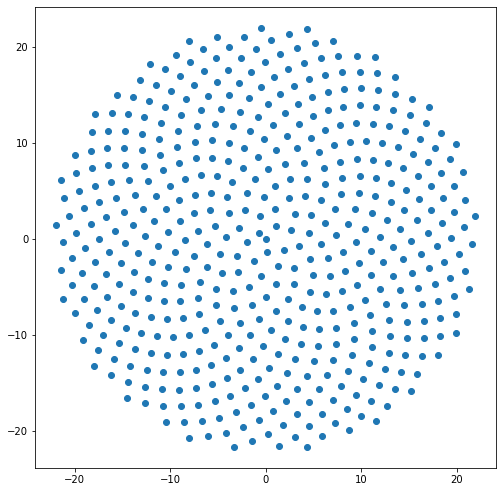

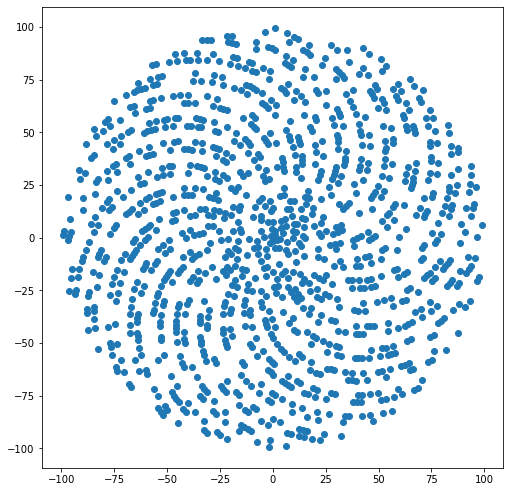

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

def xcoor(k):
    return np.sqrt(k)*math.cos( k* math.pi*(3-np.sqrt(5)) )

def ycoor(k):
    return np.sqrt(k)*math.sin( k* math.pi*(3-np.sqrt(5)) )

def isPrime(n):
  for i in range(2,int(math.sqrt(n))+1):
    if (n%i) == 0:
      return False
  return True

def sunflowerPoints(n):
    points = np.arange(n)
    xcoor_v = np.vectorize(xcoor)
    ycoor_v = np.vectorize(ycoor)

    x = xcoor_v(points)
    y = ycoor_v(points)

    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_axes((0.1, 0.1, 0.8, 0.8))
    axes.scatter(x, y)
    plt.show()

def sunflowerPoints_Primes(n):
    pointsPrimes = np.array([x if (isPrime(x) == True) else 0 for x in range(n) ])

    xcoor_v = np.vectorize(xcoor)
    ycoor_v = np.vectorize(ycoor)

    x = xcoor_v(pointsPrimes)
    y = ycoor_v(pointsPrimes)

    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_axes((0.1, 0.1, 0.8, 0.8))
    axes.scatter(x, y)
    plt.show()

sunflowerPoints(500)
sunflowerPoints_Primes(10000)




# Bonusové úkoly
1. Modifikujte spinograf tak, aby menší kružnice:
    - se otáčela po vnější straně větší kružnice
    - se otáčela po rovnostraném n-úhelníku (trojúhelník, čtverec, šestiúhelník, ...)

In [ ]:
#TODO